# Module tutorial
- There are three classes in this module: Sentence and Corpus and TokenPair

In [1]:
from datastructures import Sentence, Corpus

## The Sentence object

Instantiate a Sentence object with two arguments: 
- a `conllu TokenList`
- a spacy model (the default one is "fr_core_news_sm")

In [2]:
# Open and parse conllu file
from conllu import parse

with open("fr_sequoia-ud-test.conllu", "r") as f:
    sequoia_raw = f.read()
    
sequoia_parsed = parse(sequoia_raw)

In [3]:
# Load spacy model
import spacy

spacy_model = spacy.load("fr_core_news_sm")

In [4]:
# Instantiate a Sentence object
sentence_conllu = sequoia_parsed[0]
sentence = Sentence(sentence_conllu, model=spacy_model)

### Sentence's attributes:

In [5]:
# View sentence content and length
print(f"Sentence's content: {sentence.text}")  # Or print(sentence)
print(f"Sentence's word count: {sentence.length}")

Sentence's content: cela signifie que leur consommation énergétique, qui représente actuellement 10% de la consommation énergétique moyenne de l'UE, enregistrera une forte augmentation à mesure qu'ils exigeront des commodités élémentaires comme l'eau chaude et, peut-être même, l'air conditionné, des moyens de transport et la modernisation de leurs industries.
Sentence's word count: 57


A Sentence object is, essentially, a list of TokenPair. A TokenPair object is a pair of `ConlluToken, SpacyToken`, where the ConlluToken's ***form*** matches SpacyToken's ***form***.

In [6]:
# This is why a Sentence also has a "length_token_pairs" attribute. If spacy tokenize the sentence in a different way, the number of token pair will not be identical to the word count.

print(f"Sentence's word count: {sentence.length}")
print(f"Number of TokenPair: {sentence.length_token_pairs}")

Sentence's word count: 57
Number of TokenPair: 57


### Sentence object's method:

In [7]:
# Sentence object has a method to compute accuracy:
sentence.compute_accuracy()

0.9649122807017544

## The Corpus object
- A Corpus is essentially a list of Sentence

In [8]:
# Instantiate a Corpus
corpus = Corpus()

In [9]:
# Append Sentences into Corpus
for sentence_conllu in sequoia_parsed:
    sentence = Sentence(sentence_conllu)  # The default model is "fr_core_news_sm"
    corpus.append(sentence)

### Corpus' list operations
As Corpus is essentially a customized list, it supports a few list operations:

In [10]:
# Get the number of sentences
print(f"Number of sentences: {len(corpus)}")

# Create a slice
five_sentences = corpus[:5]

# Sort sentences (by length)
corpus_copied = corpus.copy()
corpus_copied.sort(reverse=True)
print(f"Longest sentence in corpus: {corpus_copied[0].length}")
print(f"It's number of TokenPairs: {corpus_copied[0].length_token_pairs}")

Number of sentences: 456
Longest sentence in corpus: 150
It's number of TokenPairs: 126


In [11]:
# Iterate through a Corpus
print("Frist five sentences' length:", end=" ")
for sentence in five_sentences:
    print(sentence.length, end=" ")

Frist five sentences' length: 57 23 36 41 20 

### Corpus' methods

In [12]:
# Get a corpus' upos count
label2count = corpus.get_label_count(sort=True, reverse=True)
print(label2count)

{'NOUN': 2140, 'ADP': 1326, 'DET': 1174, 'PUNCT': 1069, 'VERB': 780, 'ADJ': 633, 'PROPN': 461, 'ADV': 409, 'PRON': 403, 'AUX': 345, '_': 308, 'NUM': 228, 'CCONJ': 220, 'SCONJ': 106, 'X': 36, 'SYM': 3}


In [13]:
# Compute word error rate and sentence error rate
wer = corpus.compute_wer()
ser = corpus.compute_ser()
print(f"Corpus' wer: {round(wer, 2)}")
print(f"Corpus' ser: {round(ser, 2)}")

Corpus' wer: 0.93
Corpus' ser: 0.39


In [14]:
# Compute f1
f1_macro = corpus.compute_f1("macro")
f1_micro = corpus.compute_f1("micro")
f1_weighted = corpus.compute_f1("weighted")
print(f"F1 macro: {round(f1_macro, 2)}")
print(f"F1 micro: {round(f1_micro, 2)}")
print(f"F1 weighted: {round(f1_weighted, 2)}")

F1 macro: 0.84
F1 micro: 0.93
F1 weighted: 0.92


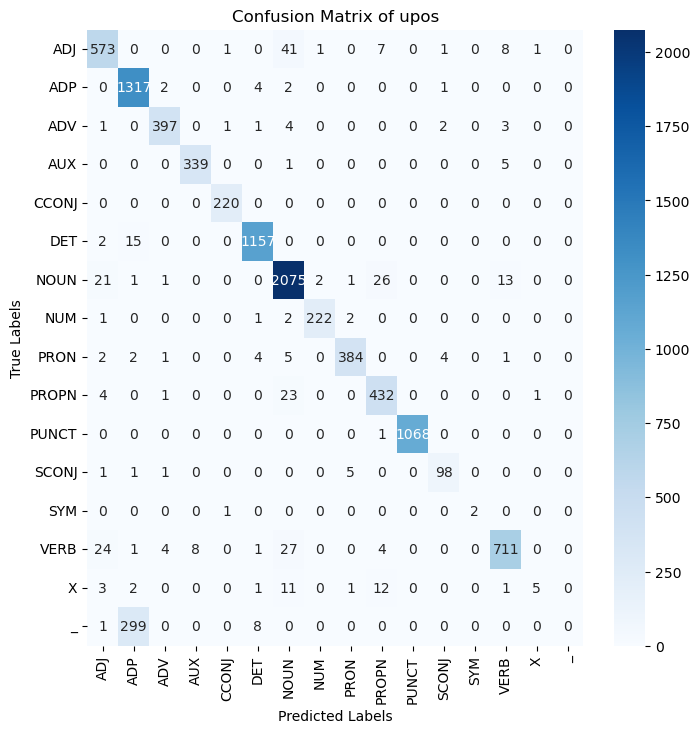

In [15]:
# Show confusion matrix 
# (I don't find this feature very useful as there are two many rows and columns. Need a better visualization idea)
corpus.confusion_matrix()